# Read Image

(649, 998)
144759.99999999843
3290
43.999999999999524
43


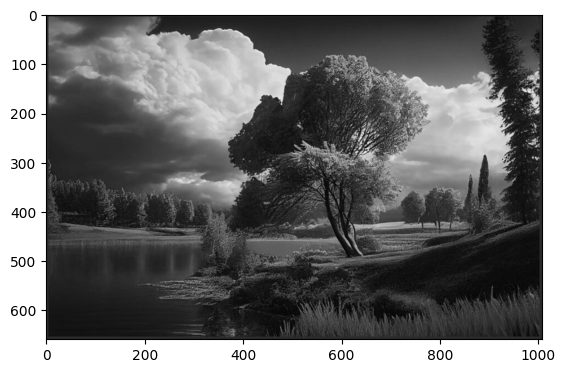

In [1]:
import numpy as np
import matplotlib.pyplot as plt

img = plt.imread('image/nature.jpg')
img = np.mean(img, axis=-1)

print(img.shape)
height, width = img.shape

#calculate the average
sum = 0
cnt = 0
for i in range(height):
    for j in range(width):
        if (i==0)or(i==(height-1))or(j==0)or(j==(width-1)):
            sum += img[i][j]
            cnt += 1

print(sum)
print(cnt)
avg = sum/cnt
print(avg)
avg_int = int(avg)%256
print(avg_int)

# add boundary to the image
padding_size=5
padded_img = np.full((height+ 2*padding_size, width+ 2*padding_size), avg_int, dtype=np.uint8)
padded_img[padding_size:-padding_size,padding_size:-padding_size] = img
plt.imshow(padded_img, cmap='gray')

# Q2 Histogram and Histogram Equilization

251


<BarContainer object of 256 artists>

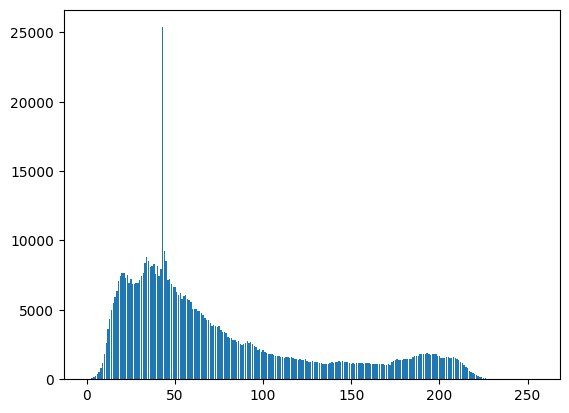

In [2]:
p_img = padded_img
# print(p_img.shape)
height, width = p_img.shape
# print(height, width)
print(np.max(p_img))
nk = np.zeros(256)
for i in range(height-1):
    for j in range(width):
        nk[(p_img[i][j])] += 1

# print(nk)

plt.bar(np.arange(256), nk)

# Equilize This histogram

664272


<BarContainer object of 256 artists>

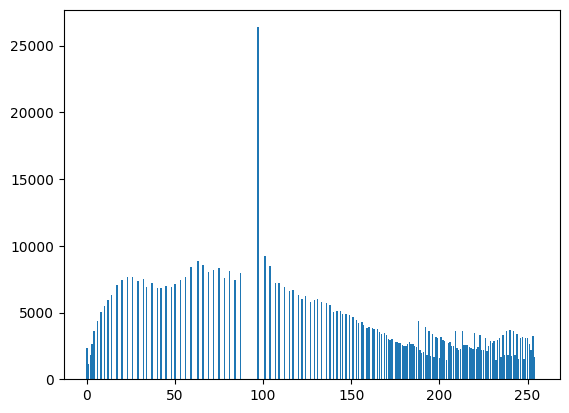

In [3]:
pdf = np.zeros(256)
total_pixel = height*width
print(total_pixel)

for i in range(256):
    pdf[i] = (nk[i]/total_pixel)

# print(pdf)
cdf = np.zeros(256)
cdf[0] = pdf[0]
for i in range(256):
    cdf[i] = pdf[i]+cdf[i-1]
# print(cdf[-1])
equi_val = np.zeros(256)
for i in range(256):
    equi_val[i] = int(cdf[i]*255)

equi_img = np.zeros((height, width), dtype=np.uint8)
for i in range(height):
    for j in range(width):
        equi_img[i][j]=equi_val[p_img[i][j]]


# plt.imshow(equi_img, cmap='gray')

nk2 = np.zeros(256)
for i in range(height):
    for j in range(width):
        nk2[equi_img[i][j]] += 1

plt.bar(np.arange(256), nk2)

# Show all the result 

Text(0.5, 1.0, 'Histogram Equilize Image')

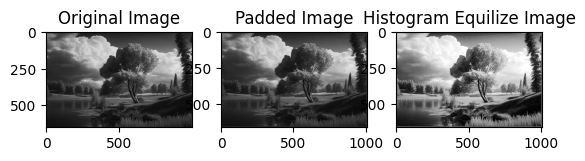

In [4]:
fig, axis = plt.subplots(1,3)
axis[0].imshow(img, cmap='gray')
axis[0].set_title('Original Image')

axis[1].imshow(padded_img, cmap='gray')
axis[1].set_title('Padded Image')

axis[2].imshow(equi_img, cmap='gray')
axis[2].set_title('Histogram Equilize Image')

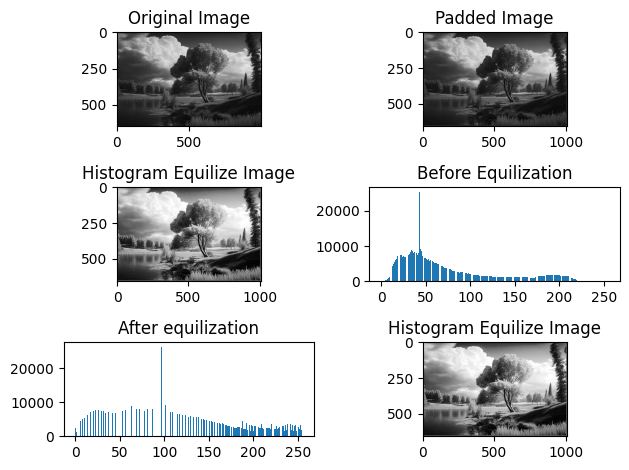

In [5]:
fig, axis = plt.subplots(3,2)
axis[0][0].imshow(img, cmap='gray')
axis[0][0].set_title('Original Image')

axis[0][1].imshow(padded_img, cmap='gray')
axis[0][1].set_title('Padded Image')

axis[1][0].imshow(equi_img, cmap='gray')
axis[1][0].set_title('Histogram Equilize Image')

axis[1][1].bar(np.arange(256), nk)
axis[1][1].set_title('Before Equilization')

axis[2][0].bar(np.arange(256), nk2)
axis[2][0].set_title('After equilization')

axis[2][1].imshow(equi_img, cmap='gray')
axis[2][1].set_title('Histogram Equilize Image')

plt.tight_layout()

In [6]:
print(np.sum([7000, 1500, 5500, 2000]))

16000
